<a href="https://colab.research.google.com/github/wahyunh10/Demand-Forecasting-Public-Bike-Rental-Project/blob/main/Clustering_Model_Normalization_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering Model: Normalization Technique**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("cleandata.csv", index_col='datetime', parse_dates=True)
df.head()

,month,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rentals
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
dfc = df.copy()
dfc.head()

,month,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rentals
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
dfc['windspeed'] = dfc['windspeed'] / dfc['windspeed'].max()
dfc['humidity'] = dfc['humidity'] / dfc['humidity'].max()
col = ["temp", "atemp"]
dfc[col] = (dfc[col]-dfc[col].min())/(dfc[col].max()-dfc[col].min())

In [5]:
dfc

,month,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rentals
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,1,0.224490,0.305068,0.81,0.000000,3,13,16
2011-01-01 01:00:00,1,1,1,0,0,1,0.204082,0.288064,0.80,0.000000,8,32,40
2011-01-01 02:00:00,1,2,1,0,0,1,0.204082,0.288064,0.80,0.000000,5,27,32
2011-01-01 03:00:00,1,3,1,0,0,1,0.224490,0.305068,0.75,0.000000,3,10,13
2011-01-01 04:00:00,1,4,1,0,0,1,0.224490,0.305068,0.75,0.000000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,12,19,4,0,1,1,0.367347,0.423649,0.50,0.838772,7,329,336
2012-12-19 20:00:00,12,20,4,0,1,1,0.346939,0.372860,0.57,0.483899,10,231,241
2012-12-19 21:00:00,12,21,4,0,1,1,0.326531,0.338964,0.61,0.483899,4,164,168


In [6]:
dummy_season = pd.get_dummies(dfc.season, prefix='season')
dummy_season.sample(n=10,random_state = 12)

,season_1,season_2,season_3,season_4
datetime,,,,
2012-01-10 12:00:00,1,0,0,0
2011-03-03 16:00:00,1,0,0,0
2011-11-05 16:00:00,0,0,0,1
2012-12-08 17:00:00,0,0,0,1
2011-06-10 17:00:00,0,1,0,0
2011-08-13 09:00:00,0,0,1,0
2012-01-01 12:00:00,1,0,0,0
2012-08-04 05:00:00,0,0,1,0
2011-12-17 16:00:00,0,0,0,1


In [7]:
dummy_weather = pd.get_dummies(dfc.weather, prefix='weather')
dummy_weather.sample(n=10, random_state = 12)

,weather_1,weather_2,weather_3,weather_4
datetime,,,,
2012-01-10 12:00:00,1,0,0,0
2011-03-03 16:00:00,1,0,0,0
2011-11-05 16:00:00,1,0,0,0
2012-12-08 17:00:00,1,0,0,0
2011-06-10 17:00:00,1,0,0,0
2011-08-13 09:00:00,0,1,0,0
2012-01-01 12:00:00,1,0,0,0
2012-08-04 05:00:00,1,0,0,0
2011-12-17 16:00:00,1,0,0,0


In [8]:
dummy_hour = pd.get_dummies(dfc.hour, prefix='hour')
dummy_hour.sample(n=10, random_state = 12)

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-10 12:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-03 16:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2011-11-05 16:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2012-12-08 17:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2011-06-10 17:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2011-08-13 09:00:00,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 12:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-08-04 05:00:00,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-12-17 16:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [9]:
dfc = pd.concat([dfc, dummy_hour], axis=1)
dfc = pd.concat([dfc, dummy_weather], axis=1)
dfc = pd.concat([dfc, dummy_season], axis=1)

In [10]:
dfc.head(10)

,month,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,...,hour_22,hour_23,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,1,0.224490,0.305068,0.81,0.000000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 01:00:00,1,1,1,0,0,1,0.204082,0.288064,0.80,0.000000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 02:00:00,1,2,1,0,0,1,0.204082,0.288064,0.80,0.000000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 03:00:00,1,3,1,0,0,1,0.224490,0.305068,0.75,0.000000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 04:00:00,1,4,1,0,0,1,0.224490,0.305068,0.75,0.000000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 05:00:00,1,5,1,0,0,2,0.224490,0.271171,0.75,0.193646,...,0,0,0,1,0,0,1,0,0,0
2011-01-01 06:00:00,1,6,1,0,0,1,0.204082,0.288064,0.80,0.000000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 07:00:00,1,7,1,0,0,1,0.183673,0.271171,0.86,0.000000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 08:00:00,1,8,1,0,0,1,0.224490,0.305068,0.75,0.000000,...,0,0,1,0,0,0,1,0,0,0


In [11]:
dfc.drop(['hour','season','weather','atemp','casual','registered'], axis = 1, inplace=True)
dfc.head(20)

,month,holiday,workingday,temp,humidity,windspeed,rentals,hour_0,hour_1,hour_2,...,hour_22,hour_23,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,0.224490,0.81,0.000000,16,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 01:00:00,1,0,0,0.204082,0.80,0.000000,40,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 02:00:00,1,0,0,0.204082,0.80,0.000000,32,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 03:00:00,1,0,0,0.224490,0.75,0.000000,13,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 04:00:00,1,0,0,0.224490,0.75,0.000000,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 05:00:00,1,0,0,0.224490,0.75,0.193646,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2011-01-01 06:00:00,1,0,0,0.204082,0.80,0.000000,2,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 07:00:00,1,0,0,0.183673,0.86,0.000000,3,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 08:00:00,1,0,0,0.224490,0.75,0.000000,8,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [12]:
dfc.columns

Index(['month', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'rentals', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'season_1', 'season_2',
       'season_3', 'season_4'],
      dtype='object')

In [13]:
X = dfc[['temp','hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23','weather_1',
       'weather_2', 'weather_3', 'weather_4', 'season_1', 'season_2',
       'season_3', 'season_4']]

In [14]:
X.columns

Index(['temp', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'season_1', 'season_2',
       'season_3', 'season_4'],
      dtype='object')

In [15]:
y = dfc[['rentals']]

# **Training & Testing Split**

In [16]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=100)

# **KNN Model Building**

In [18]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [19]:
rmse_val = [] # to store rmse values for different k
for K in range(50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  # fit the model
    pred=model.predict(X_test) # make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) # calculate rmse
    rmse_val.append(error) # store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 121.51827336454302
RMSE value for k=  2 is: 105.90672610704205
RMSE value for k=  3 is: 99.82630622404417
RMSE value for k=  4 is: 97.68959678622448
RMSE value for k=  5 is: 95.75870695388333
RMSE value for k=  6 is: 94.78672069330842
RMSE value for k=  7 is: 94.38081848858117
RMSE value for k=  8 is: 93.51132086609493
RMSE value for k=  9 is: 93.03053806088134
RMSE value for k=  10 is: 92.07223624569225
RMSE value for k=  11 is: 91.69674284769843
RMSE value for k=  12 is: 91.82486688434422
RMSE value for k=  13 is: 91.85745347037465
RMSE value for k=  14 is: 91.96411486360856
RMSE value for k=  15 is: 91.78661713264107
RMSE value for k=  16 is: 92.0082335727505
RMSE value for k=  17 is: 91.82745353354358
RMSE value for k=  18 is: 91.81043992317191
RMSE value for k=  19 is: 91.70200229998555
RMSE value for k=  20 is: 91.65218093424654
RMSE value for k=  21 is: 91.78423351703118
RMSE value for k=  22 is: 91.81540146954734
RMSE value for k=  23 is: 91.73617701380

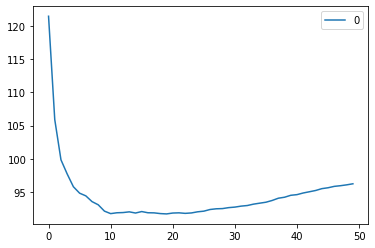

In [20]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [21]:
np.where(curve[0]==min(curve[0])) # Find the lowest value for K from the plot above

(array([19]),)

# **Model Building**

In [22]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor(13)
KNR.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [23]:
predicted=KNR.predict(X_test)
predicted

array([[ 70.92307692],
       [386.23076923],
       [  9.53846154],
       ...,
       [ 46.69230769],
       [504.53846154],
       [ 69.76923077]])

# **Performance Evaluation**

In [24]:
metrics.mean_absolute_error(y_test,predicted)

63.24486337010497

In [25]:
metrics.mean_squared_error(y_test,predicted)

8437.791758062045

In [26]:
np.sqrt(metrics.mean_squared_error(y_test,predicted))

91.85745347037465